In [18]:
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# Nashville coordinates: 36.1627° N, 86.7816° W
coordinates = [36.1627, -86.7816]

latitude = coordinates[0]
longitude = coordinates[1]

nash_map = folium.Map(location=[latitude,longitude],zoom_start=8.5)
nash_map

In [46]:
url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json"
df = gpd.read_file(url)

In [52]:
df

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
626,47,37058,4737058,B5,G6350,S,464781429,30591516,+36.4443434,-087.8766571,N,"MULTIPOLYGON (((-87.72741 36.56186, -87.72750 ..."
627,47,37618,4737618,B5,G6350,S,178562093,1954118,+36.4603392,-082.2087442,N,"POLYGON ((-82.19124 36.50128, -82.19129 36.501..."
628,47,37686,4737686,B5,G6350,S,76467241,8061258,+36.4402090,-082.3488106,N,"POLYGON ((-82.37055 36.40224, -82.37090 36.401..."
629,47,37031,4737031,B5,G6350,S,103905880,6311985,+36.3661539,-086.2927183,N,"POLYGON ((-86.34176 36.42639, -86.34157 36.426..."


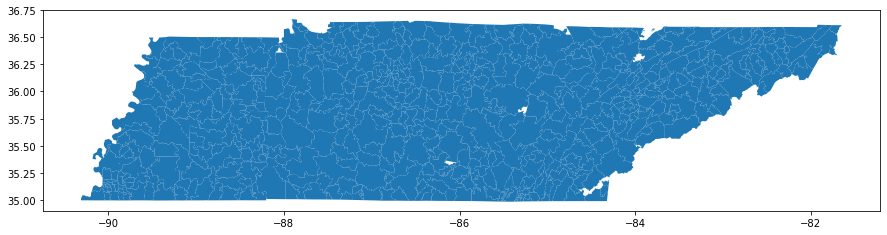

In [78]:
df.plot(figsize=(15,8));

In [74]:
zipcodes_list = ['37115', '37148', '37221', '37174', '37210']
zipcodes_df = df[df.ZCTA5CE10.isin(zipcodes_list)]

In [75]:
zipcodes_df

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
21,47,37115,4737115,B5,G6350,S,55138051,1625361,+36.2538466,-086.6955302,N,"POLYGON ((-86.69010 36.31413, -86.68859 36.314..."
72,47,37148,4737148,B5,G6350,S,353965826,471923,+36.5666358,-086.4952467,N,"POLYGON ((-86.60634 36.56922, -86.60634 36.569..."
370,47,37174,4737174,B5,G6350,S,177667375,219654,+35.7198343,-086.8984492,N,"MULTIPOLYGON (((-86.90831 35.78450, -86.90834 ..."
417,47,37221,4737221,B5,G6350,S,134232227,281508,+36.0512939,-086.9687981,N,"MULTIPOLYGON (((-86.89449 36.07570, -86.89460 ..."
581,47,37210,4737210,B5,G6350,S,23936701,400226,+36.1492647,-086.7329567,N,"POLYGON ((-86.76847 36.14766, -86.76859 36.147..."


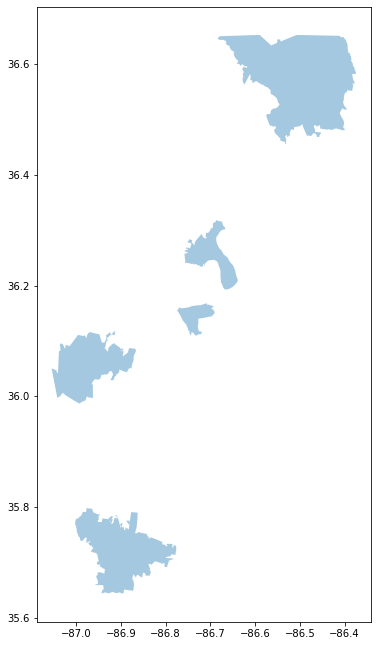

In [77]:
zipcodes_plots = zipcodes_df.plot(figsize=(6,12), alpha=0.4, )

In [107]:
# Import fiona to create .geojson file from .GeoDataFrame

import fiona
fiona.supported_drivers

# Create .geojson file

zipcodes_df.to_file("zipcodes_df.geojson", driver='GeoJSON')


# import the libraries for making files I think? (Copies and pasted this)

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)


# Access the .geojson file

overlay1 = os.path.join('zipcodes_df.geojson')


# Join overlay with nashville map above

folium.GeoJson(overlay1).add_to(nash_map)
nash_map